In [1498]:
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from pylab import rcParams
import os
from matplotlib import pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
StateCrime = sm.datasets.statecrime.load_pandas().data
State = []

In [1499]:
print(sm.datasets.statecrime.NOTE)

::

    Number of observations: 51
    Number of variables: 8
    Variable name definitions:

    state
        All 50 states plus DC.
    violent
        Rate of violent crimes / 100,000 population. Includes murder, forcible
        rape, robbery, and aggravated assault. Numbers for Illinois and
        Minnesota do not include forcible rapes. Footnote included with the
        American Statistical Abstract table reads:
        "The data collection methodology for the offense of forcible
        rape used by the Illinois and the Minnesota state Uniform Crime
        Reporting (UCR) Programs (with the exception of Rockford, Illinois,
        and Minneapolis and St. Paul, Minnesota) does not comply with
        national UCR guidelines. Consequently, their state figures for
        forcible rape and violent crime (of which forcible rape is a part)
        are not published in this table."
    murder
        Rate of murders / 100,000 population.
    hs_grad
        Percent of population h

In [1500]:
StateCrime.head()

,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
California,473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [1501]:
StateCrime.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas ',
       'Kentucky ', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana ',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [1502]:
State = pd.DataFrame(StateCrime.index)

In [1503]:
StateCrime.index = list(range(0,len(StateCrime)))

In [1504]:
StateCrime['State'] = State

In [1505]:
StateCrime.columns

Index(['violent', 'murder', 'hs_grad', 'poverty', 'single', 'white', 'urban',
       'State'],
      dtype='object')

In [1506]:
StateCrime.columns = ['ViolCrimeRate', 'MurdRate', 'HighSchGrad', \
                      'PovRate', 'SingleRate', 'WhiteRaceRate', 'UrbanAreaRate', 'State']

In [1507]:
StateCrime = StateCrime[['State','ViolCrimeRate', 'MurdRate', 'HighSchGrad', \
                      'PovRate', 'SingleRate', 'WhiteRaceRate', 'UrbanAreaRate']]

In [1508]:
StateCrime.head()

,State,ViolCrimeRate,MurdRate,HighSchGrad,PovRate,SingleRate,WhiteRaceRate,UrbanAreaRate
0,Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
1,Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
2,Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
3,Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
4,California,473.4,5.4,80.6,14.2,27.8,62.7,89.73


In [1509]:
StateCrime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   ViolCrimeRate  51 non-null     float64
 2   MurdRate       51 non-null     float64
 3   HighSchGrad    51 non-null     float64
 4   PovRate        51 non-null     float64
 5   SingleRate     51 non-null     float64
 6   WhiteRaceRate  51 non-null     float64
 7   UrbanAreaRate  51 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.6+ KB


In [1510]:
os.getcwd()

'/Users/user/Desktop/Python/MojProjekt'

In [1511]:
StateRegion = pd.read_csv('regions.csv')

In [1512]:
StateRegion.head()

,State,Region,Division
0,Maine,Northeast,New England
1,New Hampshire,Northeast,New England
2,Vermont,Northeast,New England
3,Massachusetts,Northeast,New England
4,Rhode Island,Northeast,New England


In [1513]:
StateCrime = StateCrime.merge(right = StateRegion, how = "left", on = "State")

In [1514]:
StateCrime.Region.unique() #we have nan

array(['South', 'West', 'Northeast', 'Midwest', nan], dtype=object)

In [1515]:
null_requirement = StateCrime.Region.isna()

In [1516]:
StateCrime.State[null_requirement]

16      Kansas 
17    Kentucky 
26     Montana 
Name: State, dtype: object

In [1517]:
StateCrime.State.unique() #3 states have additional spaces, one is missing

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas ', 'Kentucky ', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana ', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [1518]:
StateCrime.State[17:18] = "Kentucky"
StateCrime.State[16:17] = "Kansas"
StateCrime.State[26:27] = "Montana"

In [1519]:
StateCrime = StateCrime[['State','ViolCrimeRate', 'MurdRate', 'HighSchGrad', \
                      'PovRate', 'SingleRate', 'WhiteRaceRate', 'UrbanAreaRate']]

In [1520]:
StateCrime = StateCrime.merge(right = StateRegion, how = "left", on = "State")
StateCrime = StateCrime[StateCrime.State != 'District of Columbia']

In [1521]:
StateCrime.Region.unique()

array(['South', 'West', 'Northeast', 'Midwest'], dtype=object)

In [1522]:
StateCrime.describe()

,ViolCrimeRate,MurdRate,HighSchGrad,PovRate,SingleRate,WhiteRaceRate,UrbanAreaRate
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,392.734000,4.514000,86.874000,13.764000,24.730000,78.754000,59.883600
std,160.816541,2.410691,3.411913,3.072974,3.541835,12.463305,20.232974
min,119.900000,0.900000,79.900000,8.500000,17.900000,26.900000,17.380000
25%,262.275000,2.625000,83.975000,11.500000,22.050000,71.000000,46.177500
50%,362.250000,4.650000,87.500000,13.800000,25.450000,80.100000,58.585000
75%,503.375000,5.975000,89.800000,16.275000,27.125000,87.925000,76.482500
max,704.600000,12.300000,91.800000,21.900000,32.800000,95.800000,92.240000


In [1523]:
StateCrime.head()

,State,ViolCrimeRate,MurdRate,HighSchGrad,PovRate,SingleRate,WhiteRaceRate,UrbanAreaRate,Region,Division
0,Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65,South,East South Central
1,Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46,West,Pacific
2,Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07,West,Mountain
3,Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54,South,West South Central
4,California,473.4,5.4,80.6,14.2,27.8,62.7,89.73,West,Pacific


Text(0.04, 0.5, 'Violent Crime Rate')

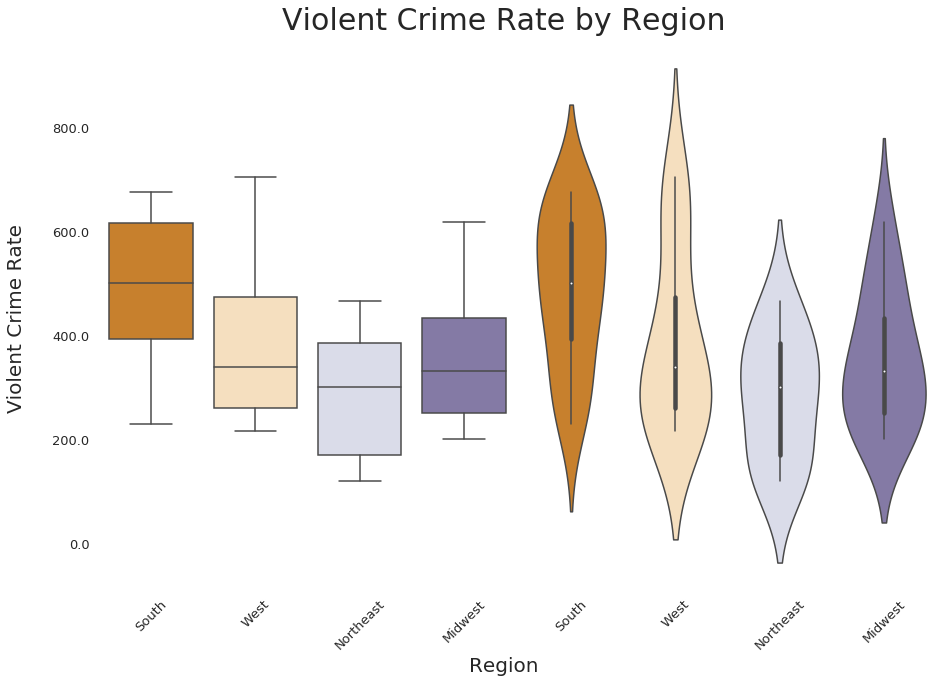

In [1524]:
sns.set(style='darkgrid', palette = 'deep', font = "Courier", rc={'figure.figsize':(15,10), \
                                                   "axes.facecolor":"white", "axes.edgecolor" : "none"})
f, ax = plt.subplots(1,2, sharey = True, sharex = True)
f.subplots_adjust(wspace = 0.007)
boxplt = sns.boxplot(data = StateCrime, x = "Region", y = "ViolCrimeRate", showfliers = False, \
                     orient = "v", palette = "PuOr", ax = ax[0])
vioplt = sns.violinplot(data = StateCrime, x = "Region", y = "ViolCrimeRate", showfliers = False, \
                     orient = "v", palette = "PuOr", ax = ax[1])
boxplt.set_ylabel(ylabel = "", fontsize = 20)
boxplt.set_xlabel(xlabel = "", fontsize = 20)
boxplt.set_yticklabels(boxplt.get_yticks(), size = 13)
boxplt.set_xticklabels(labels = StateCrime.Region.unique(), size = 13, rotation = 45)
vioplt.set_ylabel(ylabel = "", fontsize = 20)
vioplt.set_xlabel(xlabel = "", fontsize = 20)
vioplt.set_xticklabels(labels = StateCrime.Region.unique(), size = 13, rotation = 45)
f.text(x = 0.5, y = 0.90, s = 'Violent Crime Rate by Region', ha='center', fontsize = 30)
f.text(x = 0.5, y = 0.009, s = 'Region', ha='center', fontsize = 20)
f.text(x = 0.04, y = 0.5, s = 'Violent Crime Rate', va='center', rotation='vertical', fontsize = 20)

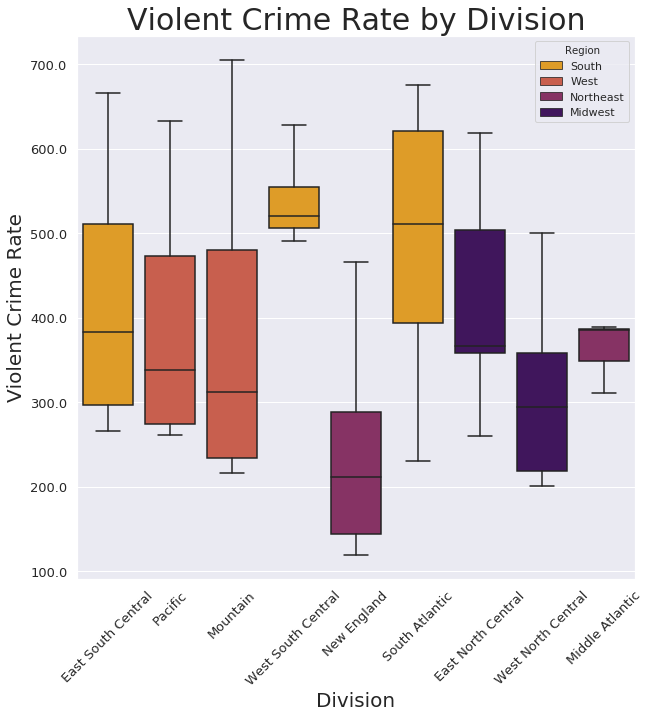

In [1525]:
sns.set(style='darkgrid', palette = 'deep', font = "Courier", rc={'figure.figsize':(10,10)})
boxplt = sns.boxplot(data = StateCrime, x = "Division", y = "ViolCrimeRate", showfliers = False, \
                     orient = "v", palette = "inferno_r", hue = "Region", dodge=False)
boxplt.set_title(label = "Violent Crime Rate by Division", fontsize = 30)
boxplt.set_ylabel(ylabel = "Violent Crime Rate", fontsize = 20)
boxplt.set_xlabel(xlabel = "Division", fontsize = 20)
boxplt.set_yticklabels(boxplt.get_yticks(), size = 13)
boxplt.set_xticklabels(labels = StateCrime.Division.unique(), size = 13, rotation = 45)
boxplt

In [1526]:
StateCrime.Division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic'], dtype=object)

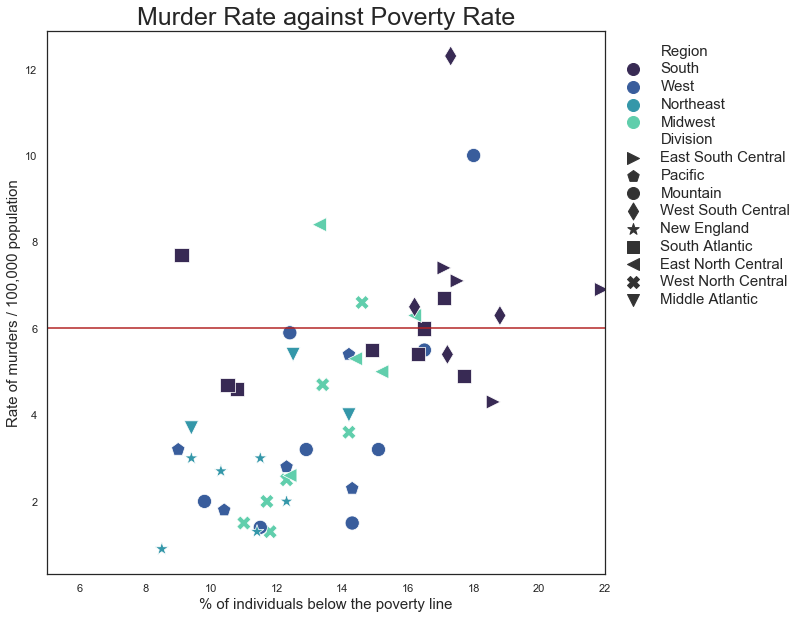

In [1527]:
xlim = 22
list1 = [6] * (xlim + 5)
sns.set(style='white', palette = 'bright', rc={'figure.figsize':(10,10)})
markers = {'East South Central': '>', 'Pacific': 'p', 'Mountain': 'o', 'West South Central': 'd',
       'New England': '*', 'South Atlantic': 's', 'East North Central': '<',
       'West North Central': 'X', 'Middle Atlantic': 'v'}
scatplt = sns.scatterplot(data = StateCrime, x = "PovRate", y = "MurdRate", hue = "Region",\
                          palette = "mako", s = 200, style = "Division", markers = markers)
scatplt.legend(loc = 'upper left', bbox_to_anchor = (1,1), fontsize = 15, markerscale = 2,\
               frameon = False, labelspacing = 0.25)
plt.plot(list1, color = 'firebrick')
scatplt.set_title(label = "Murder Rate against Poverty Rate", fontsize = 25)
scatplt.set_ylabel(ylabel = "Rate of murders / 100,000 population", fontsize = 15)
scatplt.set_xlabel(xlabel = "% of individuals below the poverty line", fontsize = 15)
scatplt.set_xlim(5,xlim)
scatplt

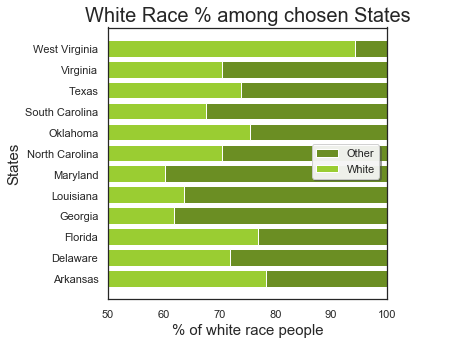

In [1528]:
req = ['West South Central', 'South Atlantic']
StateNames = StateCrime[StateCrime.Division.isin(req)]
fig, ax = plt.subplots()
plt1 = plt.barh(StateNames.State, 100, color ="olivedrab", label = "Other")
plt2 = plt.barh(StateNames.State, StateCrime[StateCrime.Division.isin(req)].WhiteRaceRate,\
                color ="yellowgreen", label = "White")
ax.set(xlim = (50,100))
ax.set_title("White Race % among chosen States", fontsize = 20)
ax.set_xlabel("% of white race people", fontsize = 15)
ax.set_ylabel("States", fontsize = 15)
fig.set_size_inches(5, 5)
fig.legend(loc = 'upper left', bbox_to_anchor = (0.85,0.57), shadow = True, fancybox = True, framealpha = 0.9)
plt.show()

---

In [1529]:
from sklearn import datasets 
Iris = datasets.load_iris()

In [1530]:
IrisDataFrame = pd.DataFrame(Iris.data, columns=['SepalLen','SepalWid', 'PetalLen', 'PetalWid']) 

In [1531]:
IrisDataFrameTar = pd.DataFrame(Iris.target, columns=['Target']) 

In [1532]:
IrisDataFrame['Target'] = IrisDataFrameTar

In [1533]:
for i in range(0, len(IrisDataFrame)):
    if IrisDataFrame.Target[i] == 0:
        IrisDataFrame.Target[i] = "Iris_Setosa"
    elif IrisDataFrame.Target[i] == 1:
        IrisDataFrame.Target[i] = "Iris_Vercicolor"
    else:
        IrisDataFrame.Target[i] = "Iris_Virginica"

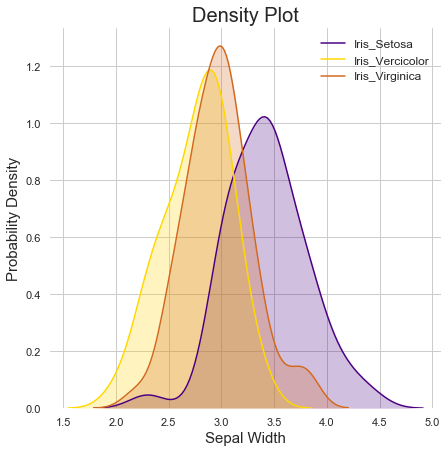

In [1557]:
sns.set(style='whitegrid', rc={"axes.edgecolor" : "none"})
rcParams['figure.figsize'] = 7, 7
color = ["indigo", "gold", "chocolate"]
for i in range(0,len(IrisDataFrame.Target.unique())):
    plt_1 = sns.kdeplot(data = IrisDataFrame[IrisDataFrame.Target == IrisDataFrame.Target.unique()[i]].SepalWid, \
                      shade = True, label = IrisDataFrame.Target.unique()[i], color = color[i])
plt_1.set_title("Density Plot", fontsize = 20)
plt_1.set_xlabel("Sepal Width", fontsize = 15)
plt_1.set_ylabel("Probability Density", fontsize = 15)
plt_1.legend(frameon = False, framealpha = 0.5, prop = {'size':12})

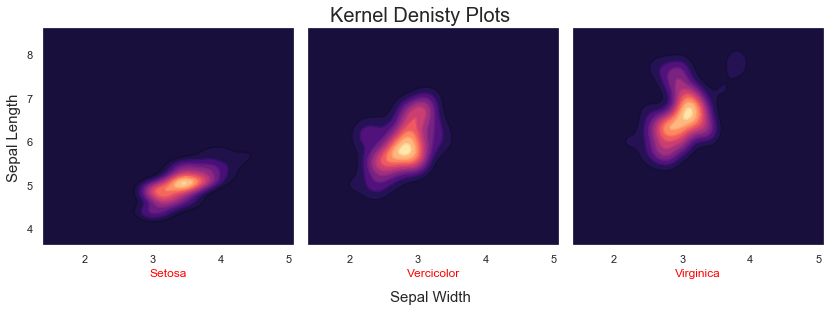

In [1572]:
sns.set_style("dark", rc = {"axes.facecolor":"#180f3d"})
f, ax = plt.subplots(1,3, figsize = (14,4), sharey = True, sharex = True)
f.subplots_adjust(wspace = 0.05)
for i in range(0,len(IrisDataFrame.Target.unique())):
    string = IrisDataFrame.Target.unique()[i]
    SepalWidDate = IrisDataFrame[IrisDataFrame.Target == string].SepalWid
    SepalLenDate = IrisDataFrame[IrisDataFrame.Target == string].SepalLen
    name = sns.kdeplot(data = SepalWidDate, data2= SepalLenDate, shade = True, shade_lowest = False, \
                cmap = "magma" ,ax = ax[i])
    name = sns.kdeplot(data = SepalWidDate, data2= SepalLenDate, cmap = "magma", ax = ax[i])
    name.set_ylabel(ylabel = "")
    name.set_xlabel(xlabel = string[5:], color = "red")
f.text(x = 0.5, y = 0.90, s = 'Kernel Denisty Plots', ha='center', fontsize = 20)
f.text(x = 0.51, y = -0.07, s = 'Sepal Width', ha='center', fontsize = 15)
f.text(x = 0.09, y = 0.5, s = 'Sepal Length', va='center', rotation='vertical', fontsize = 15)
f.show()